In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

In [3]:
raw = pd.read_csv('data/tr_eikon_eod_data.csv')

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 13 columns):
Date      2216 non-null object
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12), object(1)
memory usage: 225.1+ KB


In [6]:
data = pd.DataFrame(raw['AAPL.O']).dropna()

In [7]:
SMA1 = 42
SMA2= 252
data['SMA1'] = data['AAPL.O'].rolling(SMA1).mean()
data['SMA2'] = data['AAPL.O'].rolling(SMA2).mean()

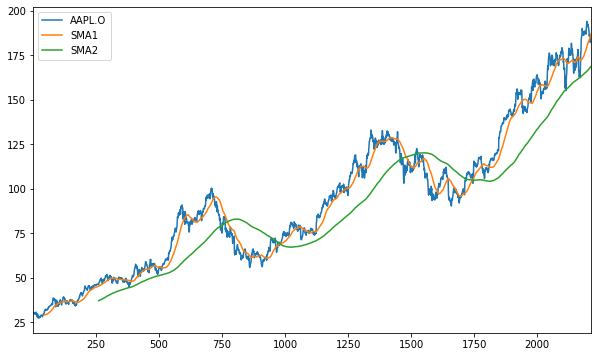

In [8]:
data.plot(figsize=(10,6))

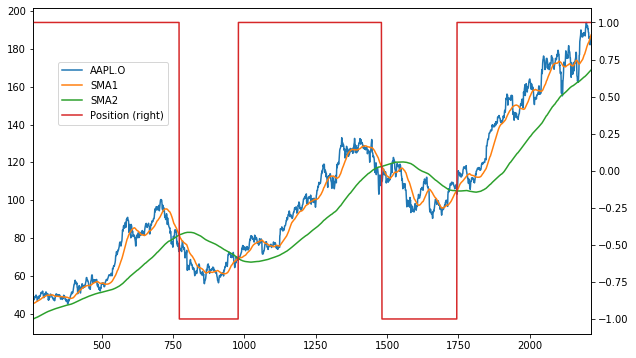

In [10]:
# Basic strategy, go long when shorter SMA is above longer SMA. Go short when shorter SMA is below long SMA
data.dropna(inplace=True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
ax = data.plot(secondary_y = 'Position', figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

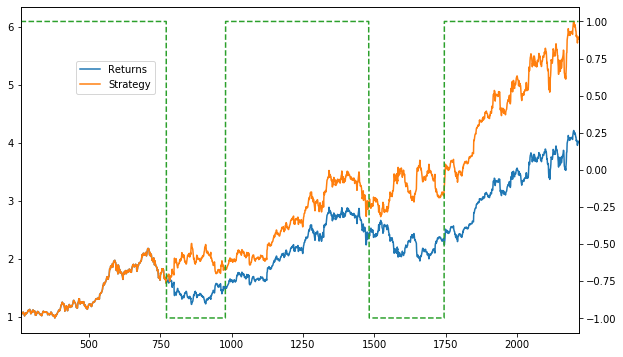

In [13]:
data['Returns'] = np.log(data['AAPL.O'] / data['AAPL.O'].shift(1))
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data.dropna(inplace=True)
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [15]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
C = 1
models = {
    'log_reg' : linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm' : SVC(C=C)
}

In [18]:
def fit_models(data):
    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
           for model in models.keys()}

In [20]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [21]:
create_bins(data)

NameError: name 'cols' is not defined

In [22]:
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [25]:
create_lags(data)

KeyError: 'returns'

In [24]:
lags = 2